
visualisasii harga penutup


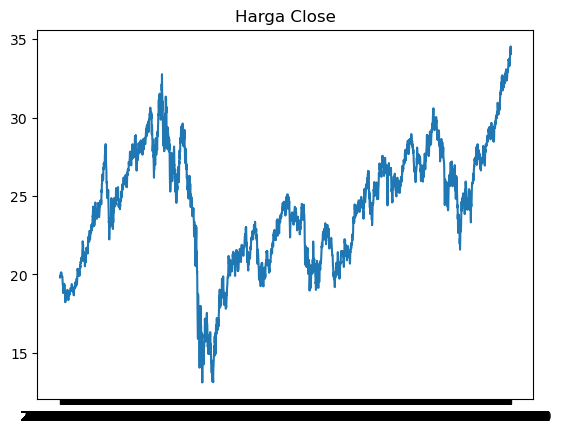

Epoch 1/20
74/74 ━━━━━━━━━━━━━━━━━━━━ 4s 24ms/step - loss: 0.0117
Epoch 2/20
74/74 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0011
Epoch 3/20
74/74 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 0.0011
Epoch 4/20
74/74 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 0.0010
Epoch 5/20
74/74 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 9.5922e-04
Epoch 6/20
74/74 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 9.5356e-04
Epoch 7/20
74/74 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 9.0535e-04
Epoch 8/20
74/74 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 8.6978e-04
Epoch 9/20
74/74 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 7.5987e-04
Epoch 10/20
74/74 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 7.3674e-04
Epoch 11/20
74/74 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 6.9998e-04
Epoch 12/20
74/74 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 6.9457e-04
Epoch 13/20
74/74 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 6.5113e-04
Epoch 14/20
74/74 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 6.3135e-04
Epoch 15/20
74/74 ━━━━━━━━━━━━━

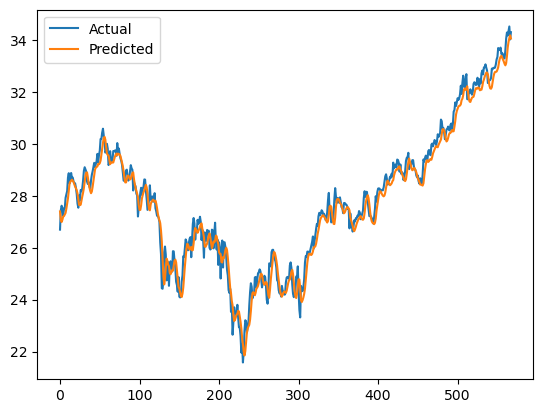

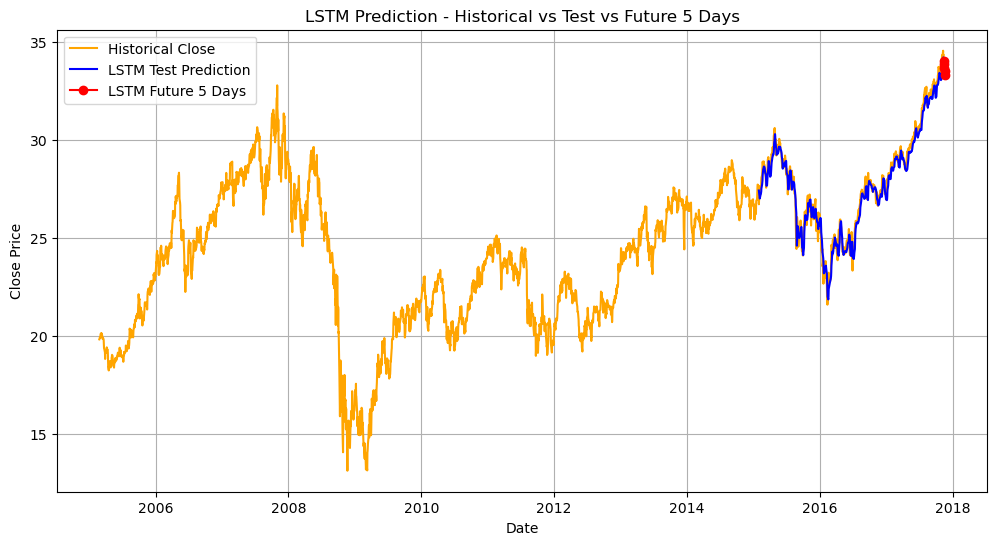

In [44]:
#LSTM

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

df = pd.read_csv('/home/andra/Downloads/adra.us.txt', sep=',')
df.head()
df['date'] = pd.to_datetime(df['Date'])
df = df.sort_values('Date')
df.set_index('Date', inplace=True)
data = df[['Close']]

print('\nvisualisasii harga penutup')

#visualisasi harga Close
plt.plot(data)
plt.title("Harga Close")
plt.show()

#normalisasi
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data)

#training dan testing
train_size = int(len(scaled_data) * 0.8)
train = scaled_data[:train_size]
test = scaled_data[train_size:]

#Membuat squence untuk prediksi Timee Series
def create_dataset(dataset, time_step=30):
    X, y = [], []
    for i in range(len(dataset)-time_step):
        X.append(dataset[i:i+time_step])
        y.append(dataset[i+time_step])
    return np.array(X), np.array(y)

time_step = 30
X_train, y_train = create_dataset(train, time_step)
X_test, y_test = create_dataset(test, time_step)
#3D data untuk LSTM
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

#Buat model prediksi Gunakan LSTM

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(30,1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

model.fit(X_train, y_train, epochs=20, batch_size=32)


#prediksi
predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions)

#bandingkan hasil prediksi dengan data asli
print("hasil Prediksi")

real = scaler.inverse_transform(y_test)

plt.plot(real, label='Actual')
plt.plot(predictions, label='Predicted')
plt.legend()
plt.show


#coba prediksi 5 periode kedepan

future = []
last_30 = scaled_data[-30:]

for i in range(5):
    pred = model.predict(last_30.reshape(1,30,1))
    future.append(pred[0])
    last_30 = np.append(last_30[1:], pred)

#Ubah ke nilai sebenarnya
future = scaler.inverse_transform(future)
future

# 1. Buat index untuk 5 periode ke depan
df.index = pd.to_datetime(df.index)

last_date = df.index[-1]  # tanggal terakhir di data asli
future_index = pd.date_range(start=last_date + pd.Timedelta(days=1),
                             periods=len(future),
                             freq='B')  # B = business day / hari kerja

# 2. Plot
plt.figure(figsize=(12,6))

# Harga historis
plt.plot(df.index, df['Close'], label='Historical Close', color='orange')

# Prediksi test set (dihitung dari X_test)
plt.plot(df.index[-len(predictions):], predictions, label='LSTM Test Prediction', color='blue')

# Prediksi 5 periode ke depan
plt.plot(future_index, future, label='LSTM Future 5 Days', color='red', marker='o')

plt.title("LSTM Prediction - Historical vs Test vs Future 5 Days")
plt.xlabel("Date")
plt.ylabel("Close Price")
plt.legend()
plt.grid(True)
plt.show()

Jumlah NaN tersisa: 0
Total data : 3316
Train data : 2652
Test data  : 664

Training ARIMA model...
Model training selesai!

========== METRICS ARIMA ==========
RMSE : 3.9156
MAE  : 3.3670
MAPE : 12.87%


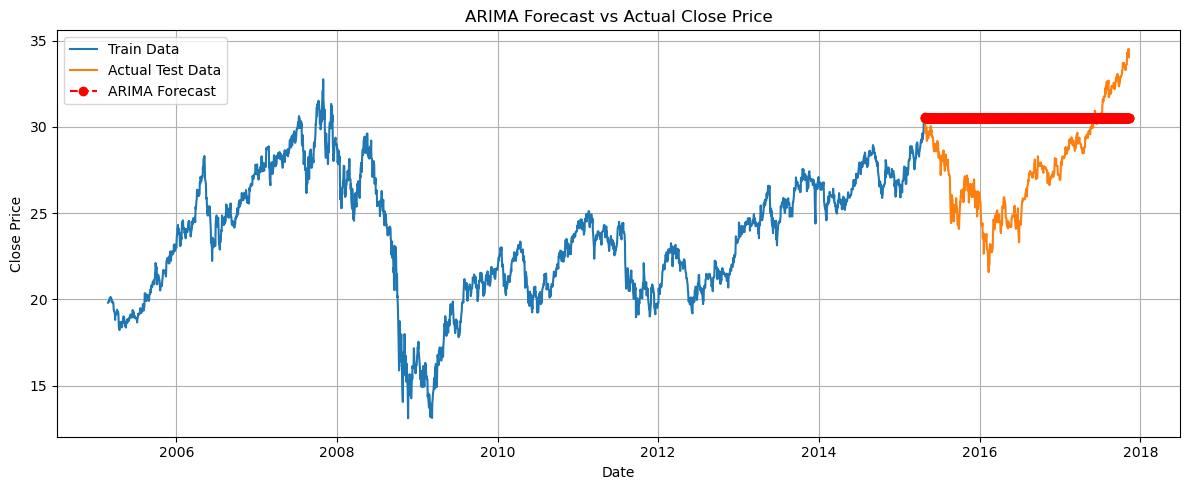


========= SAMPLE PREDIKSI =========


,Actual_Close,ARIMA_Prediction
Date,,
2015-04-28,30.325,30.558278
2015-04-29,30.138,30.540911
2015-04-30,29.668,30.541253
2015-05-01,29.742,30.534466
2015-05-04,30.006,30.531116
2015-05-05,29.818,30.532642
2015-05-06,29.188,30.533163
2015-05-07,29.255,30.533106
2015-05-08,29.723,30.533289


In [39]:

#              FULL SCRIPT ARIMA PREDICTION



# 1. IMPORT LIBRARIES

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error
import warnings
warnings.filterwarnings("ignore")


# 2. LOAD DATASET

df = pd.read_csv('/home/andra/Downloads/adra.us.txt', sep=',')
df = df.dropna(how='any')
df = df.reset_index(drop
df['Date'] = pd.to_datetime(df['Date'])
df = df.sort_values('Date')
df.set_index('Date', inplace=True)


df['Close'] = df['Close'].fillna(method='ffill')   # isi NaN dengan data sebelumnya
df['Close'] = df['Close'].fillna(method='bfill')   # jika masih ada


# Target kolom Close
series = df['Close'].astype(float)

# 3. SPLIT DATA (TRAIN 80%, TEST 20%)

train_size = int(len(series) * 0.8)
train = series.iloc[:train_size]
test  = series.iloc[train_size:]

print("Total Data :", len(series))
print("Train Data :", len(train))
print("Test Data  :", len(test))


# 4. TRAIN ARIMA MODEL

order = (5, 1, 0)   # Kamu boleh ubah untuk eksperimen

print("\nTraining ARIMA model...")
model = ARIMA(train, order=order)
model_fit = model.fit()

print("Model training selesai!")


# 5. FORECAST DENGAN ARIMA

forecast = model_fit.forecast(steps=len(test))
forecast = pd.Series(forecast, index=test.index)


# 6. HITUNG METRIK


def MAPE(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    mask = y_true != 0
    return np.mean(np.abs((y_true[mask] - y_pred[mask]) / y_true[mask])) * 100

rmse = np.sqrt(mean_squared_error(test, forecast))
mae  = mean_absolute_error(test, forecast)
mape_val = MAPE(test, forecast)

print("\n========== METRICS ARIMA ==========")
print(f"RMSE : {rmse:.4f}")
print(f"MAE  : {mae:.4f}")
print(f"MAPE : {mape_val:.2f}%")

# ===============================
# 7. VISUALISASI
# ===============================
plt.figure(figsize=(12,5))
plt.plot(train.index, train.values, label='Train Data')
plt.plot(test.index, test.values, label='Actual Test Data')
plt.plot(forecast.index, forecast.values, label='ARIMA Forecast')
plt.title("ARIMA Forecast vs Actual Close Price")
plt.xlabel("Date")
plt.ylabel("Close Price")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# ===============================
# 8. TAMPILKAN SAMPLE HASIL
# ===============================
comparison = pd.DataFrame({
    "Actual_Close": test,
    "ARIMA_Prediction": forecast
})

print("\n========= SAMPLE PREDIKSI =========")
display(comparison.head(10))


Visualisasi harga High


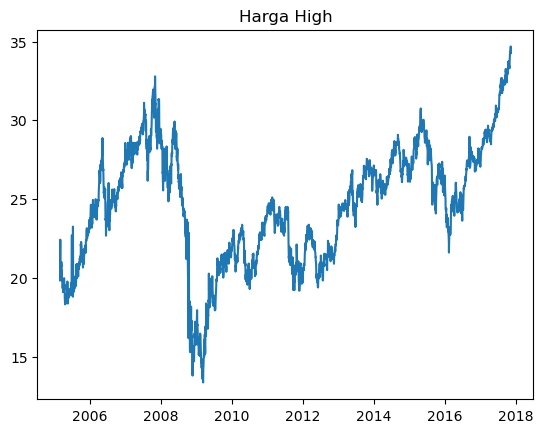

Epoch 1/20
74/74 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step - loss: 0.0184
Epoch 2/20
74/74 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 0.0013
Epoch 3/20
74/74 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 0.0011
Epoch 4/20
74/74 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 0.0011
Epoch 5/20
74/74 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 0.0011
Epoch 6/20
74/74 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 0.0011
Epoch 7/20
74/74 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 8.9866e-04
Epoch 8/20
74/74 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 8.6255e-04
Epoch 9/20
74/74 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - loss: 8.3100e-04
Epoch 10/20
74/74 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 8.3325e-04
Epoch 11/20
74/74 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 7.6614e-04
Epoch 12/20
74/74 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 7.4435e-04
Epoch 13/20
74/74 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 6.8704e-04
Epoch 14/20
74/74 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 6.9108e-04
Epoch 15/20
74/74 ━━━━━━━━━━━━━━━━━━━━ 

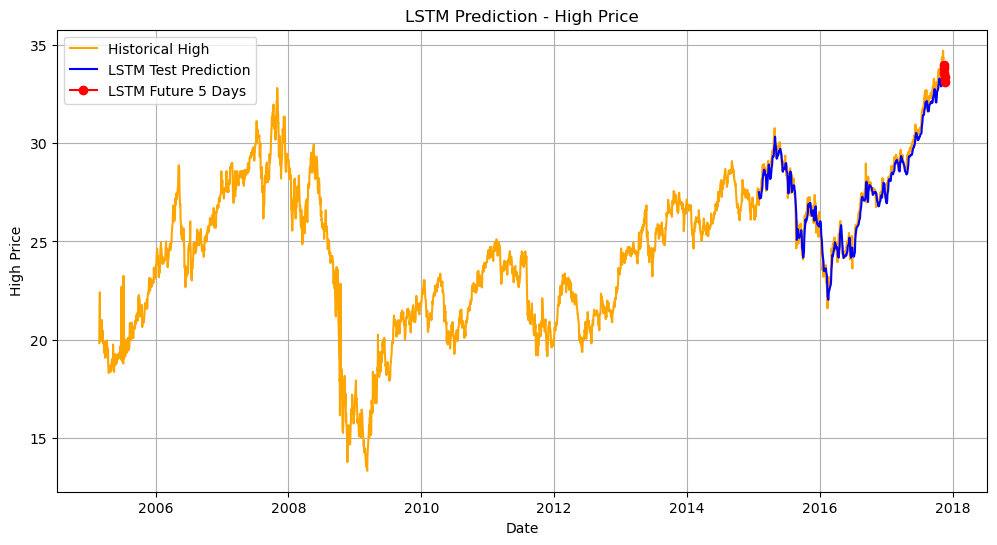

In [56]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# ==========================
# 1. Load Data
# ==========================
df = pd.read_csv('/home/andra/Downloads/adra.us.txt', sep=',')
df['Date'] = pd.to_datetime(df['Date'])
df = df.sort_values('Date')
df.set_index('Date', inplace=True)

# Target prediksi: High
data = df[['High']]

print('\nVisualisasi harga High')
plt.plot(data)
plt.title("Harga High")
plt.show()

# ==========================
# 2. Normalisasi
# ==========================
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data)

# ==========================
# 3. Split train/test
# ==========================
train_size = int(len(scaled_data) * 0.8)
train = scaled_data[:train_size]
test  = scaled_data[train_size:]

# ==========================
# 4. Membuat sequence
# ==========================
def create_dataset(dataset, time_step=30):
    X, y = [], []
    for i in range(len(dataset)-time_step):
        X.append(dataset[i:i+time_step])
        y.append(dataset[i+time_step])
    return np.array(X), np.array(y)

time_step = 30
X_train, y_train = create_dataset(train, time_step)
X_test, y_test   = create_dataset(test, time_step)

# reshape untuk LSTM
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test  = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

# ==========================
# 5. Build LSTM Model
# ==========================
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(time_step,1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

model.fit(X_train, y_train, epochs=20, batch_size=32)

# ==========================
# 6. Prediksi Test Set
# ==========================
predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions)

# ==========================
# 7. Prediksi 5 Periode ke Depan
# ==========================
future = []
last_30 = scaled_data[-30:]

for i in range(5):
    pred = model.predict(last_30.reshape(1,30,1))
    future.append(pred[0])
    last_30 = np.append(last_30[1:], pred)

future = scaler.inverse_transform(future)

# ==========================
# 8. Buat Index untuk 5 hari ke depan
# ==========================
last_date = df.index[-1]
future_index = pd.date_range(start=last_date + pd.Timedelta(days=1),
                             periods=len(future),
                             freq='B')  # hanya hari kerja

# ==========================
# 9. Plot
# ==========================
plt.figure(figsize=(12,6))

# Harga historis
plt.plot(df.index, df['High'], label='Historical High', color='orange')

# Prediksi test set
plt.plot(df.index[-len(predictions):], predictions, label='LSTM Test Prediction', color='blue')

# Prediksi 5 hari ke depan
plt.plot(future_index, future, label='LSTM Future 5 Days', color='red', marker='o')

plt.title("LSTM Prediction - High Price")
plt.xlabel("Date")
plt.ylabel("High Price")
plt.legend()
plt.grid(True)
plt.show()


Epoch 1/20
74/74 ━━━━━━━━━━━━━━━━━━━━ 4s 24ms/step - loss: 0.0215
Epoch 2/20
74/74 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 0.0013
Epoch 3/20
74/74 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0012
Epoch 4/20
74/74 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0011
Epoch 5/20
74/74 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 0.0011
Epoch 6/20
74/74 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 0.0011
Epoch 7/20
74/74 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 9.7198e-04
Epoch 8/20
74/74 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0011
Epoch 9/20
74/74 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 9.1074e-04
Epoch 10/20
74/74 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 8.8361e-04
Epoch 11/20
74/74 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 9.0367e-04
Epoch 12/20
74/74 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 8.1358e-04
Epoch 13/20
74/74 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 7.8931e-04
Epoch 14/20
74/74 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 7.4832e-04
Epoch 15/20
74/74 ━━━━━━━━━━━━━━━━━━━━ 2s 2

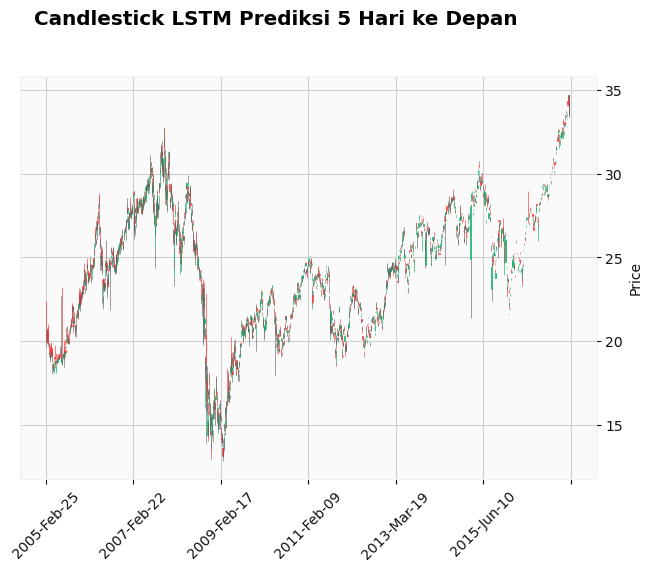

In [48]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import mplfinance as mpf

# ----------------------------
# 1. LOAD DATA
# ----------------------------
df = pd.read_csv('/home/andra/Downloads/adra.us.txt')
df['Date'] = pd.to_datetime(df['Date'])
df = df.sort_values('Date')
df.set_index('Date', inplace=True)

# Gunakan semua kolom OHLC
data = df[['Open', 'High', 'Low', 'Close']]

# ----------------------------
# 2. NORMALISASI SEMUA KOLOM
# ----------------------------
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data)

# ----------------------------
# 3. TRAIN/TEST SPLIT
# ----------------------------
train_size = int(len(scaled_data) * 0.8)
train = scaled_data[:train_size]
test  = scaled_data[train_size:]

# ----------------------------
# 4. BUAT SEQUENCE
# ----------------------------
def create_dataset(dataset, time_step=30):
    X, y = [], []
    for i in range(len(dataset)-time_step):
        X.append(dataset[i:i+time_step])
        y.append(dataset[i+time_step])
    return np.array(X), np.array(y)

time_step = 30
X_train, y_train = create_dataset(train, time_step)
X_test, y_test   = create_dataset(test, time_step)

# reshape untuk LSTM [samples, time_step, features]
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 4)
X_test  = X_test.reshape(X_test.shape[0], X_test.shape[1], 4)

# ----------------------------
# 5. BANGUN MODEL LSTM
# ----------------------------
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(time_step, 4)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(4))  # output 4 fitur: O,H,L,C
model.compile(optimizer='adam', loss='mse')

model.fit(X_train, y_train, epochs=20, batch_size=32)

# ----------------------------
# 6. PREDIKSI TEST SET
# ----------------------------
predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions)

# ----------------------------
# 7. PREDIKSI 5 PERIODE KE DEPAN
# ----------------------------
future = []
last_sequence = scaled_data[-time_step:]  # 30 bar terakhir
for i in range(5):
    pred = model.predict(last_sequence.reshape(1,time_step,4))
    future.append(pred[0])
    last_sequence = np.append(last_sequence[1:], pred, axis=0)
future = scaler.inverse_transform(future)

# buat index tanggal future
future_dates = pd.date_range(start=data.index[-1] + pd.Timedelta(days=1),
                             periods=5, freq='B')

future_df = pd.DataFrame(future, columns=['Open','High','Low','Close'], index=future_dates)

# ----------------------------
# 8. GABUNG DATA ASLI + FUTURE
# ----------------------------
plot_df = pd.concat([data, future_df])

# ----------------------------
# 9. PLOT CANDLESTICK
# ----------------------------
mpf.plot(plot_df, type='candle', style='yahoo',
         title='Candlestick LSTM Prediksi 5 Hari ke Depan',
         ylabel='Price', volume=False)


In [46]:
!pip install mplfinance

In [50]:
!pip install plotly


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 5.8 MB/s eta 0:00:00 MB/s eta 0:00:01:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2/2 [plotly]━━━━ 1/2 [plotly]
